In [249]:
from queue import PriorityQueue
class StablePriorityQueue(PriorityQueue):
    def __init__(self):
        PriorityQueue.__init__(self)
        self.counter = 0
    def put(self,item,priority=0):
        PriorityQueue.put(self, (priority,self.counter,item))
        self.counter += 1
    def get(self, *args, **kwargs):
        _, _, item = PriorityQueue.get(self, *args, **kwargs)
        return item
    


In [262]:
class HuffmanNode(object):
    def __init__(self, left=None, right=None, root=None):
        self.left=left
        self.right=right
        self.root=root
    def children(self):
        return (self.left,self.right)

def CreateHuffmanTree(frequencies):
    """"
    inputs:
    - frequencies: a list of tuple, the first element of tuple should be probability
    Returns:
    - a HuffmanTree
    """
    
    p = StablePriorityQueue()
    for value in frequencies:
        p.put(value,priority=value[0])
    while p.qsize() > 1:
        l, r = p.get(), p.get()
        node = HuffmanNode(l,r)
        value = (l[0]+r[0],node)
        p.put(value,priority=value[0])
    return p.get()


# freq = [
#     (8.167, 'a'), (1.492, 'b'), (2.782, 'c'), (4.253, 'd'),
#     (12.702, 'e'),(2.228, 'f'), (2.015, 'g'), (6.094, 'h'),
#     (6.966, 'i'), (0.153, 'j'), (0.747, 'k'), (4.025, 'l'),
#     (2.406, 'm'), (6.749, 'n'), (7.507, 'o'), (1.929, 'p'), 
#     (0.095, 'q'), (5.987, 'r'), (6.327, 's'), (9.056, 't'), 
#     (2.758, 'u'), (1.037, 'v'), (2.365, 'w'), (0.150, 'x'),
#     (1.974, 'y'), (0.074, 'z') ]

freq = [ (200/3101, 'd'), (100/3101, 'e'), (100/3101, 'f') ]
huffmantree = CreateHuffmanTree(freq)

def walk_tree(node,prefix="",code={}):
    if isinstance(node[1].left[1], HuffmanNode):
        walk_tree(node[1].left,prefix+"0", code)
    else:
        code[node[1].left[1]]=prefix+"0"
    if isinstance(node[1].right[1],HuffmanNode):
        walk_tree(node[1].right,prefix+"1", code)
    else:
        code[node[1].right[1]]=prefix+"1"
    return code

code = walk_tree(huffmantree)
for i in sorted(freq, reverse=True):
    print(i[1], '{:6.2f}'.format(i[0]), code[i[1]])

d   0.06 0
f   0.03 11
e   0.03 10


In [263]:
import itertools
pq = []                         # list of entries arranged in a heap
entry_finder = {}               # mapping of tasks to entries
REMOVED = '<removed-task>'      # placeholder for a removed task
counter = itertools.count()     # unique sequence count

def add_task(task, priority=0):
    'Add a new task or update the priority of an existing task'
    if task in entry_finder:
        remove_task(task)
    count = next(counter)
    entry = [priority, count, task]
    entry_finder[task] = entry
    heappush(pq, entry)

def remove_task(task):
    'Mark an existing task as REMOVED.  Raise KeyError if not found.'
    entry = entry_finder.pop(task)
    entry[-1] = REMOVED

def pop_task():
    'Remove and return the lowest priority task. Raise KeyError if empty.'
    while pq:
        priority, count, task = heappop(pq)
        if task is not REMOVED:
            del entry_finder[task]
            return task
    raise KeyError('pop from an empty priority queue')
    


In [370]:
import operator
from functools import reduce
import itertools as it

a = (1/4,'A')
b = (3/4,'B')

def C(n,k):
    return reduce(operator.mul,range(n-k+1,n+1))/reduce(operator.mul,range(1,k+1))

def label_count(container,label):
    count = 0
    for i in list(container):
        if label == i:
            count += 1
    return count

a = (1/4,'A')
b = (3/4,'B')
def n_extention(a1,a2,n):
    freqs = []
    s = a1[1]+a2[1]
    labels = list(it.product(s,repeat=n))
    freq_i = {}
    for label in labels:
        i = label_count(label, a1[1])
        if not freq_i.get(i): 
            freq = a1[0]**i * a2[0]**(n-i)
            freq_i[i] = freq
        else: freq = freq_i.get(i)
        freqs.append((freq,label))
    return freqs

d = {3:'xdvd'}
print(d.get(4))
list(it.product('AB',repeat=3))

None


[('A', 'A', 'A'),
 ('A', 'A', 'B'),
 ('A', 'B', 'A'),
 ('A', 'B', 'B'),
 ('B', 'A', 'A'),
 ('B', 'A', 'B'),
 ('B', 'B', 'A'),
 ('B', 'B', 'B')]

In [379]:
import numpy as np

a = (3/4,'A')
b = (1/4,'B')

n = 3
freqs = n_extention(a, b, n)
huff = CreateHuffmanTree(freqs)
code = walk_tree(huff)

codes_freq = {}
for i in sorted(freqs, reverse=True):
    print(i[1], '{:6.4f}'.format(i[0]), code[i[1]])
    codes_freq[code[i[1]]] = i[0]

freq_only = list(map(lambda freq: freq[0],freqs))
freq_only = np.array(freq_only)

def entropy(freqs):
    return np.sum(freqs*np.log2(1/freqs))

en = entropy(freq_only)

def average_length(codes_freq):
    res = 0
    su = 0
    for code,freq in codes_freq.items():
        res += len(code)*freq
        su += freq
    assert np.abs(su-1) < 1e-6
    return res

avg = average_length(codes_freq)
print(avg)
print(en)

('A', 'A', 'A') 0.4219 0
('B', 'A', 'A') 0.1406 110
('A', 'B', 'A') 0.1406 101
('A', 'A', 'B') 0.1406 100
('B', 'B', 'A') 0.0469 11111
('B', 'A', 'B') 0.0469 11110
('A', 'B', 'B') 0.0469 11101
('B', 'B', 'B') 0.0156 11100
2.46875
2.43383437338


In [385]:
etas = {}
entropy_x0 = 0.811278124459
for n in range(1,15):
    freqs = n_extention(a, b, n)
    huff = CreateHuffmanTree(freqs)
    code = walk_tree(huff,code={})
    freq_only = np.array(list(map(lambda freq: freq[0],freqs)))
    codes_freq ={}
    for i in sorted(freqs, reverse=True):
        codes_freq[code[i[1]]] = i[0]

    avg_k = average_length(codes_freq)
    entro = entropy(freq_only)
#     eta = n/avg_k*entropy_x0
    
#     r= avg_k/n
    eta = entro/avg_k
    etas[n] = eta

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.81127812445913283, 0.96151481417378715, 0.98585696136806011, 0.99134701604552755, 0.99205731961565802, 0.99095284228169223, 0.99316708870211579, 0.99450863078203444, 0.99551469021653471, 0.99642148362738159, 0.99698344100440983, 0.99725532280117446, 0.9972524038647258, 0.99734625171289104]


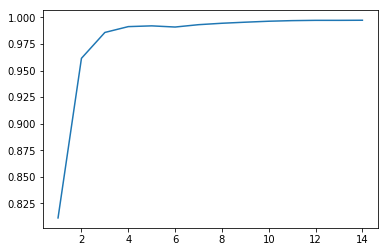

In [386]:
from matplotlib import pyplot as plt
x = []
y = []
for n,eta in etas.items():
    x.append(n)
    y.append(eta)

print(x)
print(y)
plt.plot(x,y)
plt.show()

In [310]:
freq = [(0.25,'a1'),(0.25,'a2'),(0.2,'a3'),(0.15,'a4'),(0.10,'a5'),(0.05,'a6')]
huff = CreateHuffmanTree(freq)
codes = walk_tree(huff)
for i in sorted(freq, reverse=True):
    print(i[1], '{:6.2f}'.format(i[0]), codes[i[1]])

a2   0.25 10
a1   0.25 01
a3   0.20 00
a4   0.15 110
a5   0.10 1111
a6   0.05 1110
